# CT Visialization

- **[Create DataFrame for datapath](#Create-DataFrame-for-datapath)**
- **[Load NIfTI data as NumPy Array](#Load-NIfTI-data-as-NumPy-Array)**
    - [np.rollaxis()](#np.rollaxis())
- **[Make mask data RGB](#Make-mask-data-RGB)**
- **[Convert from HU to grayscale](#Convert-from-HU-to-grayscale)**
- **[Overlay with image and mask](#Overlay-with-image-and-mask)**
- **[Plot each slice at once](#Plot-each-slice-at-once)**

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob
# this way prevents to import private functions
# from ctvis import *
import ctvis
%matplotlib inline

ModuleNotFoundError: No module named 'nibabel'

## Create DataFrame for datapath

Columns: FilePathImage, FileName, FilePathMask

In [62]:
df = ctvis.get_df_all()

## Load NIfTI data as NumPy Array

In [78]:
sample_path = df['FilePathImage'].iloc[2]
data = ctvis.load_nifti(sample_path)

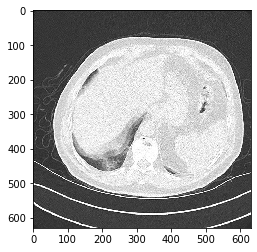

In [80]:
plt.imshow(data[:, :, 10], cmap='gray')

### np.rollaxis()

In [79]:
a = np.ones((4, 3, 2, 1))
print(a.shape)
print(np.rollaxis(a, axis=2, start=4).shape)

(4, 3, 2, 1)
(4, 3, 1, 2)


## Make mask data RGB

In [83]:
p = df['FilePathMask'].iloc[2]
seg_data = ctvis.load_nifti(p)
seg_data.shape

(630, 630, 66)

In [110]:
mask_color = ctvis.label_color(seg_data)

In [112]:
mask_color.shape

(630, 630, 66, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


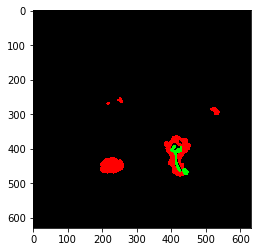

In [114]:
plt.imshow(mask_color[:, :, 20])

## Convert from HU to grayscale

data = 0, 1, 2, 3, 4, 5  
data / 5 = 0, 1/5, 2/5, 3/5, 4/5, 5/5 = 0, 1/max(data), 2/max(data), 3/max(data), 4/max(data), 5/max(data)

data = 2, 3, 4, 5  
data - 2 = 0, 1, 2, 3  
data / 3 = 0, 1/3, 2/3, 3/3

x - min(data)/max(data)-min(data)

In [117]:
index = 2
volume = ctvis.load_nifti(df.iloc[index]['FilePathImage'])
mask = ctvis.load_nifti(df.iloc[index]['FilePathMask'])
mask_color = ctvis.label_color(mask)

In [234]:
# HU window -900 ~ 100
volume_clip = np.clip(volume, -900, 100)
volume_gray = ctvis.hu_to_gray(volume_clip)

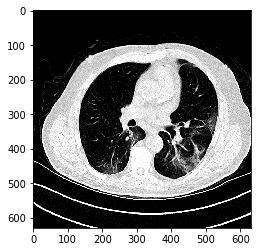

In [235]:
plt.imshow(volume_gray[:, :, 30])

## Overlay with image and mask

In [236]:
overlayed = ctvis.overlay(volume_gray, mask, mask_color, alpha=0.7)

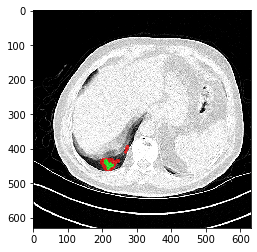

In [237]:
plt.imshow(overlayed[:, :, 10])

## Plot each slice at once

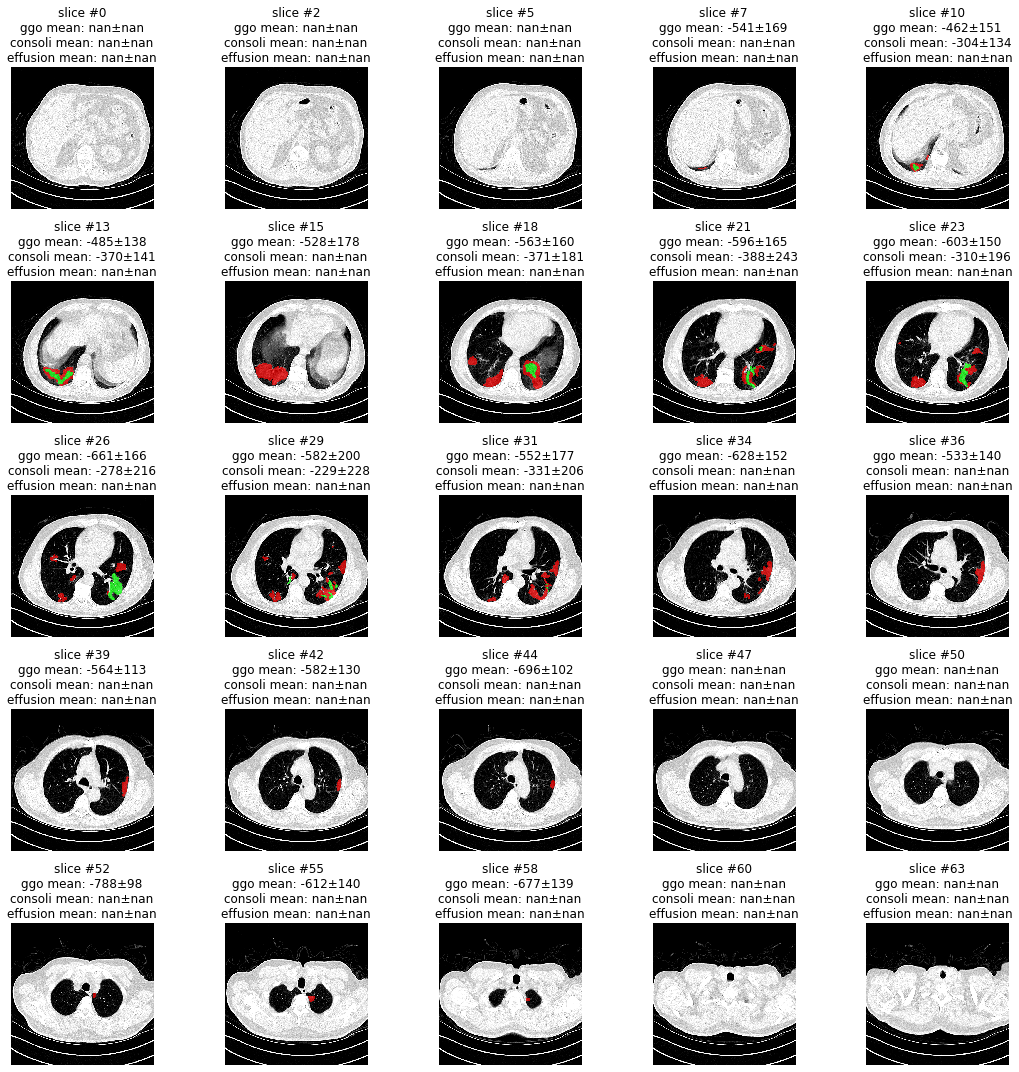

In [238]:
ctvis.vis_overlay(overlayed, volume, mask, cols=5, display_num=25)